# Pandas

Knihovna pro práci se daty pomocí konceptu strukturované tabulky. 

Vlastnosti:
- Základem dvourozměrná tabulka. Typicky sloupce jsou pojmenované veličiny, řádky jsou indexy údajů.
- Snadný výběr, třídění a reorganizace tabulek.
- Interakce s úložičti dat: CSV, JSON, Excel, databáze
- Rychlá vizualizace.
- Vazba na statistické nástroje.


In [1]:
# POZOR: Nutno instalovat moduly:'xlwt', 'xlrd'
# Pro Excel export, import.

import matplotlib.pyplot as plt
import pandas as pd 

# statické grafy 
%matplotlib inline

## DataFrame

Základní datová struktura v Pandas, je `DataFrame`. Je to tabulka, která má pojmenované sloupce podle jednotlivých "veličin" a v řádcích jsou jednotlivá "pozorování". Vytvořme si tabulku jmen dětí s četností jejich používání (asi v Americe).

In [2]:
# The inital set of baby names and bith rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
other = [0,1,2,3,4]

# We need lines of the table as tuples:
table = list(zip(names, births, other))
table

[('Bob', 968, 0),
 ('Jessica', 155, 1),
 ('Mary', 77, 2),
 ('John', 578, 3),
 ('Mel', 973, 4)]

In [3]:
# Create the data frame
df = pd.DataFrame(data = table, columns=['Names', 'Births', 0])
df

,Names,Births,0
0,Bob,968,0
1,Jessica,155,1
2,Mary,77,2
3,John,578,3
4,Mel,973,4


Libovolný sloupec lze použít jako index.

In [4]:
df_by_names = df.set_index('Names')
print(df_by_names)

# Original dataframe unchanged.
df

         Births  0
Names             
Bob         968  0
Jessica     155  1
Mary         77  2
John        578  3
Mel         973  4


,Names,Births,0
0,Bob,968,0
1,Jessica,155,1
2,Mary,77,2
3,John,578,3
4,Mel,973,4


## Indexování

Hranaté závorky vybírají sloupce. 

In [5]:
# Jeden index.
df['Names']

0        Bob
1    Jessica
2       Mary
3       John
4        Mel
Name: Names, dtype: object

In [6]:
# I číselný label vybírá sloupec.
df[0]

0    0
1    1
2    2
3    3
4    4
Name: 0, dtype: int64

Hranaté závorky obsahující slice vybírají řádky. 

In [7]:
# První řádek.
df[0:1]

,Names,Births,0
0,Bob,968,0


[`.iloc[...]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)
Obecný výběr pomocí indexů.

In [8]:
# První dva řádky; sloupce 0 a 2
df.iloc[0:2, [0,2]]

,Names,0
0,Bob,0
1,Jessica,1


[`.loc[...]`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
Obecný výběr pomocí názvů sloupců/řádků (label).

In [9]:

# První dva řádky; sloupce 0 a 2
df.loc[[0,2],['Names', 'Births']]

,Names,Births
0,Bob,968
2,Mary,77


### Otázka
**Jaký problém může být s výběrem pomocí názvů (labels)?**

In [10]:
df2 = df.append({'Names':'Bob', 'Births':10, 0:5}, ignore_index=True)
df2 = df2.set_index('Names')
print(df2)
df2.loc['Bob', :]

         Births  0
Names             
Bob         968  0
Jessica     155  1
Mary         77  2
John        578  3
Mel         973  4
Bob          10  5


,Births,0
Names,,
Bob,968,0
Bob,10,5


## IO operace
Klíčové pro práci s daty je jejich načtení a zápis z různých formátů. Vytvořená data zapíšeme a poté načteme.

In [11]:
# Write the dataframe into CSV file.
# Add column with line index.
# Write column header at the first row.
df.to_csv('births1880.csv', index=True, header=True)

# Other instance without index and header.
df.to_csv('births_raw.csv', index=False, header=False)

In [12]:
import os
current_dir = os.getcwd()
print(current_dir)

# Reading with full path, should not be necessary.
#path =  os.path.join(current_dir, 'births1880.csv')
#new_df = pd.read_csv(path)


new_df = pd.read_csv('births1880.csv')
new_df

/home/jb/Vyuka/PAV_course


,Unnamed: 0,Names,Births,0
0,0,Bob,968,0
1,1,Jessica,155,1
2,2,Mary,77,2
3,3,John,578,3
4,4,Mel,973,4


In [13]:
# Enable explicit display call


# Set own column names
new_df = pd.read_csv('births1880.csv',  names=['idx', 'name', 'freq'])
# Just text print, not so nice.
print(new_df)

# When no header, we have to tell it. Try both version.
#new_df = pd.read_csv('births_raw.csv')
new_df = pd.read_csv('births_raw.csv', header=None, names= ['name', 'freq'])

# Get nice table display.
from IPython.display import display
display(new_df)


          idx    name  freq
NaN     Names  Births     0
 0.0      Bob     968     0
 1.0  Jessica     155     1
 2.0     Mary      77     2
 3.0     John     578     3
 4.0      Mel     973     4


,name,freq
Bob,968,0
Jessica,155,1
Mary,77,2
John,578,3
Mel,973,4


## Other IO functions

[Přehled](https://pandas.pydata.org/pandas-docs/stable/io.html) s oficiální dokumentace. 
Zejména formáty: 
- CSV - comma separate values, ale možné i jiné separátory, textový formát tabulky
- JSON - hierarchický formát, řeší escapování řeťezců, stále textový formát
- MS Excel - binární proprietární, velmi nevhodný pro práci s velkými daty, velmi vhodný pro interaktivní práci s malými daty, podpora pro různé verze Excel formátů
- HDF5 - otevřený binární formát navržený pro velká data
- SAS - nativní formát velmi používaného statistického balíku
- SQL - databáze


 

In [14]:
## Sorting

# Get first two names with highest frequency.
sorted_df = new_df.sort_values('freq', ascending=False)

# head() and tail() methods
display(sorted_df.head(2))

# Slices works as well.
display(sorted_df[:2])

,name,freq
Mel,973,4
John,578,3


,name,freq
Mel,973,4
John,578,3


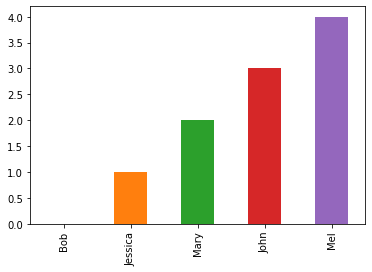

In [15]:
## Simple plotting

# See that we can index columns and rows by their names.
new_df['freq'].plot.bar()
plt.show()

,freq
name,
968,0
155,1
77,2
578,3
973,4


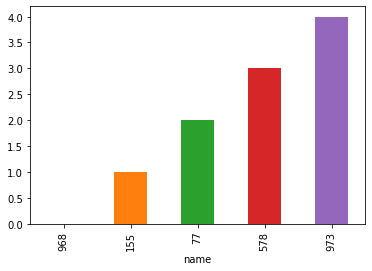

In [16]:
## Works better when we set names to rows

name_df = new_df.set_index('name')
display(name_df)
name_df['freq'].plot.bar()
plt.show()

## More complex data processing example
First prepare a data frame with random data.

In [42]:
import numpy as np

# set seed
np.random.seed(111)

# Function to generate test data
def CreateDataSet(Number=1):
    
    Output = []
    
    for i in range(Number):
        
        # Create random dates.
        rng = pd.date_range(start='1/1/2009', end='12/31/2012', freq='D')        
        rng = np.random.choice(rng, 100)        
        
        # Create random data
        count = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Mark pool
        mark = [0,1,2,3]
        
        # Make a random list of statuses
        random_mark = np.random.choice(np.array(mark), size = len(rng))
                        #[status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        states = ['GA','FL','fl','NY','NJ','TX']
        
        # Make a random list of states 
        random_states = np.random.choice(np.array(states), size = len(rng))
                        #[states[np.randint(low=0,high=len(states))] for i in range(len(rng))]
    
        Output.extend(zip(random_states, random_mark, count, rng))
        
    return Output



In [43]:
dataset = CreateDataSet(4)
r_df = pd.DataFrame(data=dataset, columns=['State','Mark','CustomerCount','StatusDate'])
r_df.info()

r_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
State            400 non-null object
Mark             400 non-null int64
CustomerCount    400 non-null int64
StatusDate       400 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 12.6+ KB


,State,Mark,CustomerCount,StatusDate
0,TX,0,798,2011-05-27
1,FL,2,515,2010-12-26
2,fl,1,135,2009-03-28
3,NJ,3,941,2012-07-23
4,FL,2,544,2010-11-13


## Excel IO

In [44]:
# POZOR: Nutno instalovat moduly:'xlwt', 'xlrd'

file_name = 'customer_reports.xls'
r_df.to_excel(file_name, index=False)
print('Data exported.')

# Parse a specific sheet 0
df = pd.read_excel(file_name, sheet=0, index_col='StatusDate')

print("Colum types:")
print(df.dtypes)

df.head()


Data exported.
Colum types:
State            object
Mark              int64
CustomerCount     int64
dtype: object


,State,Mark,CustomerCount
StatusDate,,,
2011-05-27,TX,0,798
2010-12-26,FL,2,515
2009-03-28,fl,1,135
2012-07-23,NJ,3,941
2010-11-13,FL,2,544


## Prepare data
This section attempts to clean up the data for analysis.

1. Make sure the state column is all in upper case
2. Only select records where the mark is valid: 1,2,3
3. Merge (NJ and NY) to NY in the state column
4. Remove any outliers (any odd results in the data set)


In [45]:
# See what states we have.... Of course 'fl' should be 'FL'.
df['State'].unique()

array(['TX', 'FL', 'fl', 'NJ', 'NY', 'GA'], dtype=object)

In [46]:
# Clean State Column, convert to upper case
df['State'] = df.State.apply(lambda x: x.upper())
df['State'].unique()

array(['TX', 'FL', 'NJ', 'NY', 'GA'], dtype=object)

In [47]:
# Only grab where Mark in [1,2,3]
mask = df['Mark'] in [1,2,3]    # Error since 'in' has ambiguous operands.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [53]:
# Only grab where Mark in [1,2,3]
mask = df['Mark'].isin([1,2,3])
df1 = df[mask]
df1.head()

,State,Mark,CustomerCount
StatusDate,,,
2010-12-26,FL,2,515
2009-03-28,FL,1,135
2012-07-23,NJ,3,941
2010-11-13,FL,2,544
2009-04-29,NY,2,924


In [54]:
# Convert NJ to NY
mask = df1.State == 'NJ'

# This produce a warnning as there is chained indexing.
# df1['State'][mask] = 'NY'

# This should be correct equivalent. But complain either.
#df1.loc[mask, 'State'] = 'NY'
df1['State'][mask] = 'NY'


df1['State'].unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['FL', 'NY', 'TX', 'GA'], dtype=object)

In [ ]:
df['CustomerCount'].plot(figsize=(15,5));
plt.show()

In [ ]:
# Reset index, to have StatusDate as regular column.
df_a = df.reset_index()
display(df_a.head())

# Group by State and StatusDate, sum rows with same index.
Daily = df_a.groupby(['State','StatusDate']).sum()
display(Daily.head())

# Group by State and StatusDat, use both max ans um aggregation
Daily = df_a.groupby(['State','StatusDate']).agg([np.sum, np.max])
display(Daily.head())

# Group by State and StatusDat, use max for Status, sum for Count
Daily = df_a.groupby(['State','StatusDate']) \
        .agg({'Status':np.max, 'CustomerCount':np.sum})
display(Daily.head())


In [ ]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot();
plt.show()


# Seaborn - high level statistical plotting

In [ ]:
# libraries and data
import seaborn as sns
import pandas as pd
 
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
sns.boxplot(x='group', y='value', data=df)
plt.show()

# Box plot with jitter.
ax = sns.boxplot(x='group', y='value', data=df)
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")
plt.show()

# Violin plot.
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")
plt.show()